<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


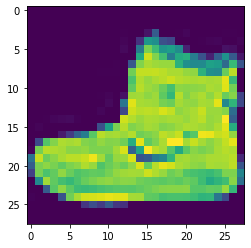

In [4]:
plt.imshow(x_train[0])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [5]:
x_train=x_train/255
x_test=x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [10]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [13]:
import tensorflow as tf

In [16]:
from tensorflow.keras.utils import to_categorical

In [19]:
len(np.unique(y_train))

10

In [21]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],)

In [41]:
early_stoping=EarlyStopping(monitor='val_loss',
                            patience=5,
                            verbose=1)

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 32)          32800     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [43]:
fashion_mnist_model=model.fit(x=x_train,
                            y=y_train,
                            epochs=25,
                            verbose=1,
                            callbacks=[early_stoping],
                            validation_data=(x_test,y_test)
                             )

Epoch 1/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5368 - accuracy: 0.8020 - val_loss: 0.3937 - val_accuracy: 0.8560
Epoch 2/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3538 - accuracy: 0.8706 - val_loss: 0.3341 - val_accuracy: 0.8796
Epoch 3/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3091 - accuracy: 0.8866 - val_loss: 0.3269 - val_accuracy: 0.8744
Epoch 4/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2802 - accuracy: 0.8956 - val_loss: 0.2866 - val_accuracy: 0.8946
Epoch 5/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2573 - accuracy: 0.9038 - val_loss: 0.2950 - val_accuracy: 0.8930
Epoch 6/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2422 - accuracy: 0.9093 - val_loss: 0.2824 - val_accuracy: 0.8948
Epoch 7/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2261 - accuracy: 0.9152 - val_loss: 0.2745 - val_ac

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.9082


[0.29962530732154846, 0.9082000255584717]

In [46]:
from sklearn.metrics import classification_report

In [48]:
predictions = (model.predict(x_test)>0.5)*1

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.84      0.86      1000
           3       0.93      0.90      0.91      1000
           4       0.83      0.88      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.68      0.72      1000
           7       0.94      0.98      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.99      0.95      0.97      1000

   micro avg       0.92      0.90      0.91     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.90      0.91     10000
 samples avg       0.90      0.90      0.90     10000



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Great Job!